In [1]:
import requests # 서버에 http 프로토콜로 요청
from bs4 import BeautifulSoup as bs # html 파싱
import time  # 5초간 휴식할 때 사용 
from datetime import datetime # 오늘 년월일 추출할 때 사용
import pandas as pd # 데이터프레임 만듦
import sqlite3
from sqlalchemy import create_engine

In [2]:
today = datetime.today() #자동으로 날짜가 입력되게끔 datetime을 뽑은거야!
print(today.year)
print(today.month)

2023
9


In [3]:
yyyy = today.year
mm = today.month
print(yyyy, mm)

2023 9


In [40]:
year = list(range(2023,2021,-1))
month = list(range(1,13))
page = list(range(1,10))
print(year)
print(month)
print(page)

[2023, 2022]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [39]:
url = "https://www.yes24.com/Product/Category/MonthWeekBestSeller"
payload = dict(categoryNumber='001', pageNumber=page, pageSize=120, type='month', saleYear=year, \
               saleMonth=month)
r = requests.get(url, params=payload) # yest24 서버에 url로 자료 요청
soup = bs(r.text, 'lxml')# yes2 서버에서 받은 응답 값 텍스트를 beautifulSoup으로 파싱

In [6]:
book_list = soup.select("#yesBestList > li")

In [7]:
title_h = book_list[0].select_one('.gd_res').get_text() if book_list[0].select_one('.gd_res') !=None else 'None' 

In [8]:
title_m = book_list[0].select_one('.gd_name').get_text()  if book_list[0].select_one('.gd_name') !=None else '제목없음'

In [9]:
title_f = book_list[0].select_one('.gd_nameF').get_text() if book_list[0].select_one('.gd_nameF') !=None else ''

In [10]:
title_e = book_list[0].select_one('.gd_nameE').get_text() if book_list[0].select_one('.gd_nameE') !=None else ''

In [11]:
detail_link = "https://www.yes24.com"+ book_list[0].select_one('.gd_name')['href'] if book_list[0].select_one('.gd_name') !=None else ''

In [12]:
print(detail_link)

https://www.yes24.com/Product/Goods/115142458


In [13]:
author = [i.get_text() for i in book_list[6].select('.authPub.info_auth > a') if book_list[6].select('.authPub.info_auth > a') !=None] # 여러명의 저자 리스트 표현식으로 for문으로 돌릴 때는 else쓰면 안돼 한줄짜리는.

In [14]:
publisher = book_list[6].select_one('.authPub.info_pub').get_text() if book_list[6].select_one('.authPub.info_pub') !=None else '출판사 없음'

In [15]:
pub_date = book_list[6].select_one('.authPub.info_date').get_text()

In [16]:
price = book_list[0].select_one('.yes_b').get_text() if book_list[0].select_one('.yes_b') !=None else '0'

In [17]:
n_reviews = book_list[0].select_one('.txC_blue').get_text() if book_list[0].select_one('.txC_blue') !=None else '리뷰없음'

In [18]:
reivew_link = book_list[0].select_one('.rating_rvCount > a')['href'] if book_list[0].select_one('.rating_rvCount > a') !=None else ''

In [19]:
rating = book_list[0].select_one('.rating_grade >.yes_b').get_text() if book_list[0].select_one('.rating_grade >.yes_b') !=None else ''

In [20]:
tags = [i.get_text() for i in book_list[6].select('.info_row.info_tag > .tag > a') if book_list[6].select('.authPub.info_auth > a') !=None]

## 모두 하나로 모으자

In [21]:
for yy in year:
    for mon in month if yy != yyyy else range(1,mm): #2023년은 1월~8월까지만 해야하니까 예외처리
        for p in page:
            print(yy, mon, p)

2023 1 1
2023 1 2
2023 1 3
2023 1 4
2023 1 5
2023 1 6
2023 1 7
2023 1 8
2023 1 9
2023 2 1
2023 2 2
2023 2 3
2023 2 4
2023 2 5
2023 2 6
2023 2 7
2023 2 8
2023 2 9
2023 3 1
2023 3 2
2023 3 3
2023 3 4
2023 3 5
2023 3 6
2023 3 7
2023 3 8
2023 3 9
2023 4 1
2023 4 2
2023 4 3
2023 4 4
2023 4 5
2023 4 6
2023 4 7
2023 4 8
2023 4 9
2023 5 1
2023 5 2
2023 5 3
2023 5 4
2023 5 5
2023 5 6
2023 5 7
2023 5 8
2023 5 9
2023 6 1
2023 6 2
2023 6 3
2023 6 4
2023 6 5
2023 6 6
2023 6 7
2023 6 8
2023 6 9
2023 7 1
2023 7 2
2023 7 3
2023 7 4
2023 7 5
2023 7 6
2023 7 7
2023 7 8
2023 7 9
2023 8 1
2023 8 2
2023 8 3
2023 8 4
2023 8 5
2023 8 6
2023 8 7
2023 8 8
2023 8 9
2022 1 1
2022 1 2
2022 1 3
2022 1 4
2022 1 5
2022 1 6
2022 1 7
2022 1 8
2022 1 9
2022 2 1
2022 2 2
2022 2 3
2022 2 4
2022 2 5
2022 2 6
2022 2 7
2022 2 8
2022 2 9
2022 3 1
2022 3 2
2022 3 3
2022 3 4
2022 3 5
2022 3 6
2022 3 7
2022 3 8
2022 3 9
2022 4 1
2022 4 2
2022 4 3
2022 4 4
2022 4 5
2022 4 6
2022 4 7
2022 4 8
2022 4 9
2022 5 1
2022 5 2
2022 5 3
2

In [38]:
soup.select_one('.gd_name')['href']

In [34]:
for detail in detail_link[:11]:
    detail_link = soup.select('.gd_name')
    print(detail)

<a class="gd_name" href="/Product/Goods/115142458" onclick="wiseLogV2('BS', '004_007_001', ''); ">만일 내가 인생을 다시 산다면</a>
<a class="gd_name" href="/Product/Goods/116579452" onclick="wiseLogV2('BS', '004_007_001', ''); ">스카이 버스</a>
<a class="gd_name" href="/Product/Goods/116046489" onclick="wiseLogV2('BS', '004_007_001', ''); ">생에 감사해</a>
<a class="gd_name" href="/Product/Goods/99308021" onclick="wiseLogV2('BS', '004_007_001', ''); ">불편한 편의점</a>
<a class="gd_name" href="/Product/Goods/111088149" onclick="wiseLogV2('BS', '004_007_001', ''); ">불편한 편의점 2</a>
<a class="gd_name" href="/Product/Goods/112253263" onclick="wiseLogV2('BS', '004_007_001', ''); ">아버지의 해방일지</a>
<a class="gd_name" href="/Product/Goods/9349031" onclick="wiseLogV2('BS', '004_007_001', ''); ">원씽 THE ONE THING</a>
<a class="gd_name" href="/Product/Goods/116206629" onclick="wiseLogV2('BS', '004_007_001', ''); ">2023 큰별쌤 최태성의 별별한국사 한국사능력검정시험 심화(1,2,3급) 상</a>
<a class="gd_name" href="/Product/Goods/113416767" onclick="wiseLogV

In [22]:
detail_link = "https://www.yes24.com"+ soup.select('.gd_name')['href']
detail_link2 = "https://www.yes24.com"+ book.select('.gd_name')['href'] if book.select('.gd_name')['href'] !=None else ""

print(detail_link)

TypeError: list indices must be integers or slices, not str

# 함수 만들기(함수형 프로그래밍)

In [171]:
def extract_bookinfo(yy, mon, book_list): #yy, mon은 변수 안에 없으니까 
    for book in book_list:
        title_h = book.select_one('.gd_res').get_text() if book.select_one('.gd_res') !=None else ''
        title_m = book.select_one('.gd_name').get_text()  if book.select_one('.gd_name') !=None else '제목없음'
        title_f = book.select_one('.gd_nameF').get_text() if book.select_one('.gd_nameF') !=None else ''
        title_e = book.select_one('.gd_nameE').get_text() if book.select_one('.gd_nameE') !=None else ''
        detail_link = "https://www.yes24.com"+ book.select_one('.gd_name')['href'] if book.select_one('.gd_name') !=None else ''
        author = [i.get_text() for i in book.select('.authPub.info_auth > a') if book.select('.authPub.info_auth > a') !=None]
        publisher = book.select_one('.authPub.info_pub').get_text() if book.select_one('.authPub.info_pub') !=None else '출판사 없음'
        pub_date = book.select_one('.authPub.info_date').get_text() if book.select_one('.authPub.info_date') !=None else ""
        price = book.select_one('.yes_b').get_text() if book.select_one('.yes_b') !=None else '0'
        n_reviews = book.select_one('.txC_blue').get_text() if book.select_one('.txC_blue') !=None else '리뷰없음'
        reivew_link = book.select_one('.rating_rvCount > a')['href'] if book.select_one('.rating_rvCount > a') !=None else ''
        rating = book.select_one('.rating_grade >.yes_b').get_text() if book.select_one('.rating_grade >.yes_b') !=None else ''
        tags = [i.get_text() for i in book.select('.info_row.info_tag > .tag > a') if book.select('.authPub.info_auth > a') !=None]
        return [yy, mon, title_h, title_m, title_f, title_e, detail_link, author, publisher, pub_date, price, n_reviews, 
                       reivew_link, rating, tags]


In [179]:
#쌤 방법 : 빈 리스트에 담지 말고 데이타프레임으로 바로 만들자
def detail_page_info(urls):
    detail_result = pd.DataFrame()
    for index, url2 in enumerate(urls[:10]):
        print(f"{index}/{len(urls)} 데이터 추출중")
        r2 = requests.get(url2)
        soup2 = bs(r2.text, 'lxml')
        book_id = url2.split("/")[-1]
        if soup2.select_one("div.infoSetCont_wrap tr:nth-child(2) > td") != None:
            if "쪽수" in soup2.select_one("div.infoSetCont_wrap tr:nth-child(2) > th").text:
                if len(soup2.select_one("div.infoSetCont_wrap tr:nth-child(2) > td").text.split('|')) == 3:
                    page, weight, size = soup2.select_one("div.infoSetCont_wrap tr:nth-child(2) > td").text.split('|')
                elif len(soup2.select_one("div.infoSetCont_wrap tr:nth-child(2) > td").text.split('|')) == 2 and \
                    soup2.select_one("div.infoSetCont_wrap tr:nth-child(2) > td").text.split('|')[1][-2:] =="mm":
                    page, size = soup2.select_one("div.infoSetCont_wrap tr:nth-child(2) > td").text.split('|')
                    weight=0

            elif "쪽수" in soup2.select_one("div.infoSetCont_wrap tr:nth-child(3) > th").text:
                if len(soup2.select_one("div.infoSetCont_wrap tr:nth-child(3) > td").text.split('|')) == 3:
                    page, weight, size = soup2.select_one("div.infoSetCont_wrap tr:nth-child(3) > td").text.split('|')
                elif len(soup2.select_one("div.infoSetCont_wrap tr:nth-child(3) > td").text.split('|')) == 2 and \
                    soup2.select_one("div.infoSetCont_wrap tr:nth-child(3) > td").text.split('|')[1][-2:] =="mm":
                    page, size = soup2.select_one("div.infoSetCont_wrap tr:nth-child(3) > td").text.split('|')
                    weight=0

            elif "쪽수" in soup2.select_one("div.infoSetCont_wrap tr:nth-child(4) > th").text:
                if len(soup2.select_one("div.infoSetCont_wrap tr:nth-child(4) > td").text.split('|')) == 3:
                    page, weight, size = soup2.select_one("div.infoSetCont_wrap tr:nth-child(4) > td").text.split('|')
                elif len(soup2.select_one("div.infoSetCont_wrap tr:nth-child(4) > td").text.split('|')) == 2 and \
                    soup2.select_one("div.infoSetCont_wrap tr:nth-child(4) > td").text.split('|')[1][-2:] =="mm":
                    page, size = soup2.select_one("div.infoSetCont_wrap tr:nth-child(4) > td").text.split('|')
                    weight=0
        else:
            page = 0
            weight = 0
            size = ""
        category = list({i.text for i in soup2.select('div.infoSetCont_wrap > dl:nth-child(1) > dd > ul a') if soup2.select('div.infoSetCont_wrap > dl:nth-child(1) > dd > ul a') !=None})
        book_intro = soup2.select_one('.infoWrap_txtInner').text if soup2.select_one('.infoWrap_txtInner') !=None else ""
        pub_book_intro = soup2.select_one('.infoWrap_txt').text if soup2.select_one('.infoWrap_txt') !=None else ""

        result_detail = [book_id, page, weight, size, category, book_intro, pub_book_intro]
        colname = ['book_id', 'page', 'weight', 'size', 'category', 'book_intro', 'pub_book_intro']
        temp = pd.DataFrame([result_detail], columns = colname)
        detail_result = pd.concat([detail_result, temp])
        detail_result.to_csv("./data/yes24_2023_01best_detail.csv, index=False")
    return detail_result

In [180]:
def to_db(df):
    for col in df.columns:
        df[col] = df[col].apply(str)
    engine = create_engine('sqlite:///data/sqlite3_yes24_final.db', echo=False)
    conn = engine.raw_connection()
    df.to_sql('yes24_final_fn', con=conn, if_exists='append')
    print("데이터베이스 저장 완료")

In [175]:
result = []
for yy in year:
    for mon in month if yy != yyyy else range(1,mm)[:1]:
        for p in page[:2]:
            print(f"{yy}년{mon}월{p}페이지 수집중", end="\r")
            url = "https://www.yes24.com/Product/Category/MonthWeekBestSeller"
            payload = dict(categoryNumber='001', pageNumber=p, pageSize=120, type='month', saleYear=yy, saleMonth=mon)
            
            try: #오류나면 찍어라
                r = requests.get(url, params=payload) # yest24 서버에 url로 자료 요청
            except Exception as e:
                print(e)
                
            soup = bs(r.text, 'lxml')# yes2 서버에서 받은 응답 값 텍스트를 beautifulSoup으로 파싱
            book_list = soup.select("#yesBestList > li")
            result.extend(extract_bookinfo(yy, mon, book_list))
            time.sleep(5)
df2 = pd.DataFrame(result, columns=['yy', 'mon', 'title_h', 'title_m', 'title_f', 'title_e', 'detail_link', 'author', 'publisher', 'pub_date', 'price', 'n_reviews', 
           'reivew_link', 'rating', 'tags'])
df2.to_csv("./data/yes24Bestseller_01.csv", index=False)
data2 = pd.read_csv("./data/yes24Bestseller_01.csv")
urls = data2['detail_link']
detail_page_data = detail_page_info(urls) # 상세페이지 데이터 추출
#여기부터 에러
#df2['book_id'] = df2['detail_link'].apply(lanbda x:x.split("/")[-1]
#final_result_df = pd.merge(df2, detail_page_data, how='inner', on="book_id")
#final_result_df.head(2)
#


ValueError: Shape of passed values is (390, 1), indices imply (390, 15)

In [176]:
detail_page_data

NameError: name 'detail_page_data' is not defined

In [177]:
df2['book_id'] = df2['detail_link'].apply(lanbda x:x.split("/")[-1]

NameError: name 'df2' is not defined

In [ ]:
final_result_df = pd.merge(df2, detail_page_data, how='inner', on="book_id")

In [ ]:
final_result_df.head(2)

In [ ]:
df2 = pd.DataFrame(result, columns=['yy', 'mon', 'title_h', 'title_m', 'title_f', 'title_e', 'detail_link', 'author', 'publisher', 'pub_date', 'price', 'n_reviews', 
                       'reivew_link', 'rating', 'tags'])

In [44]:
len(result)

2750

In [50]:
 colnames= ['year', 'month', 'title_h', 'title_m', 'title_f', 'title_e', 'detail_link', 'author', 'publisher', 
          'pub_date', 'price', 'n_reviews', 'reivew_link', 'rating', 'tags']

In [53]:
df = pd.DataFrame(result, columns=colnames)

In [54]:
df.to_csv("./data/yes24Bestseller2022-2023.csv", index=False)

In [56]:
data = pd.read_csv("./data/yes24Bestseller2022-2023.csv")

In [58]:
urls = data['detail_link']

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2750 entries, 0 to 2749
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   yy           2750 non-null   int64  
 1   mon          2750 non-null   int64  
 2   title_h      2750 non-null   object 
 3   title_m      2750 non-null   object 
 4   title_f      59 non-null     object 
 5   title_e      1405 non-null   object 
 6   detail_link  2750 non-null   object 
 7   author       2750 non-null   object 
 8   publisher    2750 non-null   object 
 9   pub_date     2750 non-null   object 
 10  price        2750 non-null   object 
 11  n_reviews    2750 non-null   object 
 12  reivew_link  2723 non-null   object 
 13  rating       2723 non-null   float64
 14  tags         2750 non-null   object 
dtypes: float64(1), int64(2), object(12)
memory usage: 322.4+ KB


In [59]:
data['detail_link']

0       https://www.yes24.com/Product/Goods/115142458
1       https://www.yes24.com/Product/Goods/116579452
2       https://www.yes24.com/Product/Goods/116046489
3        https://www.yes24.com/Product/Goods/99308021
4       https://www.yes24.com/Product/Goods/111088149
                            ...                      
2745     https://www.yes24.com/Product/Goods/97665161
2746     https://www.yes24.com/Product/Goods/99640630
2747    https://www.yes24.com/Product/Goods/105909750
2748    https://www.yes24.com/Product/Goods/104812148
2749     https://www.yes24.com/Product/Goods/82957982
Name: detail_link, Length: 2750, dtype: object

In [61]:
print(type(data['detail_link']))

<class 'pandas.core.series.Series'>


In [126]:
urls[0]

'115142458'

In [123]:
r2 = requests.get(urls[13])
soup2 = bs(r2.text, 'lxml')

<!DOCTYPE html>
<html lang="ko">
<head><link href="https://www.yes24.com/Product/Goods/115142458" rel="canonical"/> <link href="https://m.yes24.com/Goods/Detail/115142458" media="only screen and(max-width: 640px)" rel="alternate"/>
<meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<meta content="dpr, width, viewport-width, rtt, downlink, ect, UA, UA-Platform, UA-Arch, UA-Model, UA-Mobile, UA-Full-Version" http-equiv="Accept-CH"/>
<meta content="86400" http-equiv="Accept-CH-Lifetime"/>
<meta content="unsafe-url" name="referrer"/>
<meta content="width=1170" name="viewport"/>
<title>만일 내가 인생을 다시 산다면 - 예스24 </title>
<meta content="만일 내가 인생을 다시 산다면" name="title"/>
<meta content="김혜남 저" name="author"/>
<meta content="벌써 마흔이 된 당신에게 해 주고 싶은 말들 42. 김혜남 저. 메이븐. 판매가 15,480원(10% 할인). 포인트 860원(5% 적립). “하나의 문이 닫히면 또 하나의 문이 열린다. 그러니 더 이상 고민하지 말고 그냥 재미있게 살아라!”30년 동안 정신분..." name="description"/>
<meta content="2023대구올해의책,크레마클럽에있어요
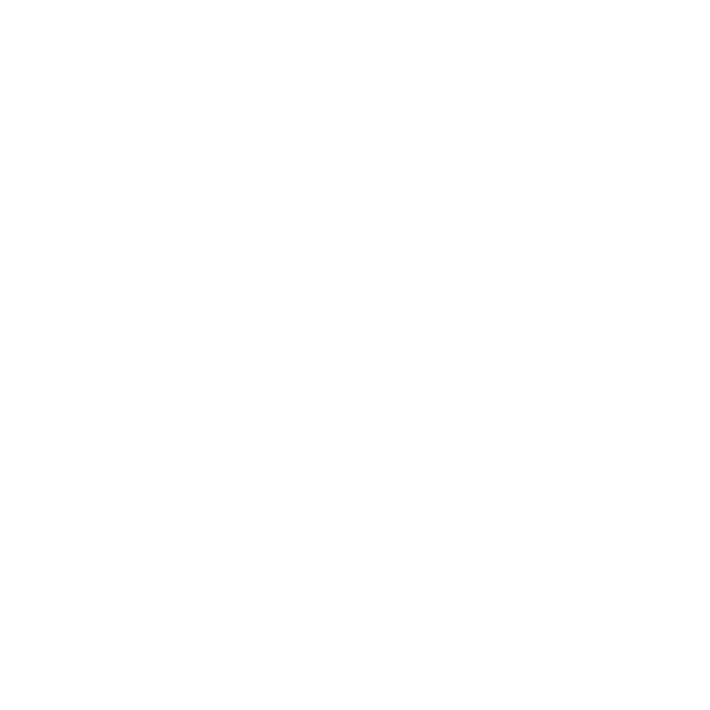
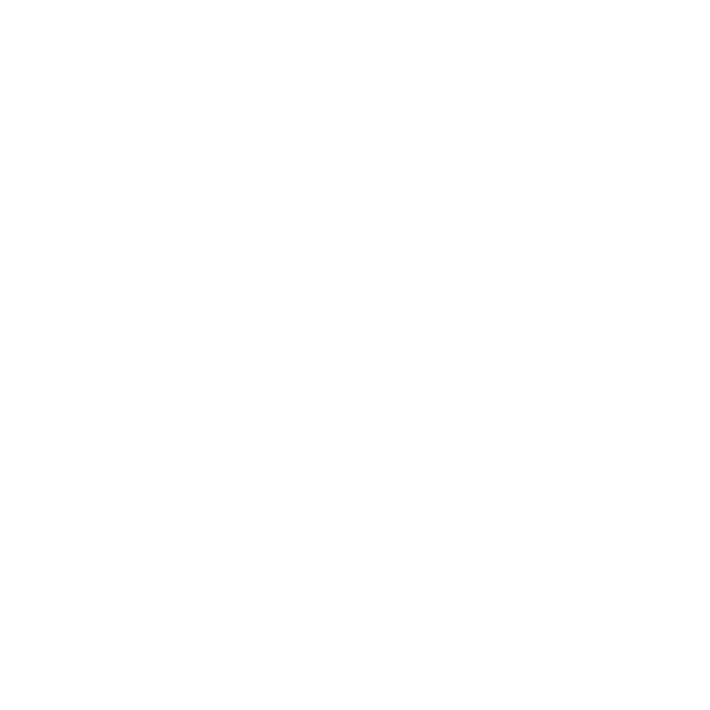
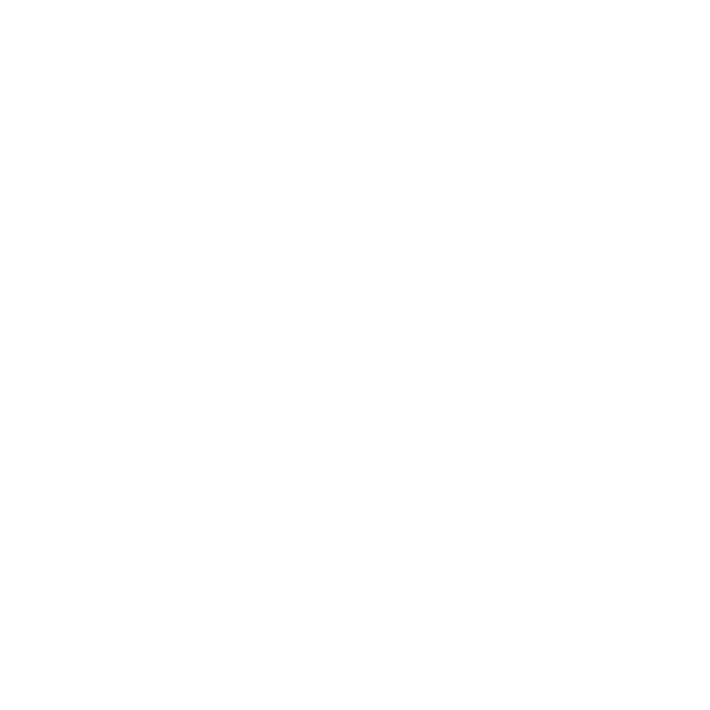
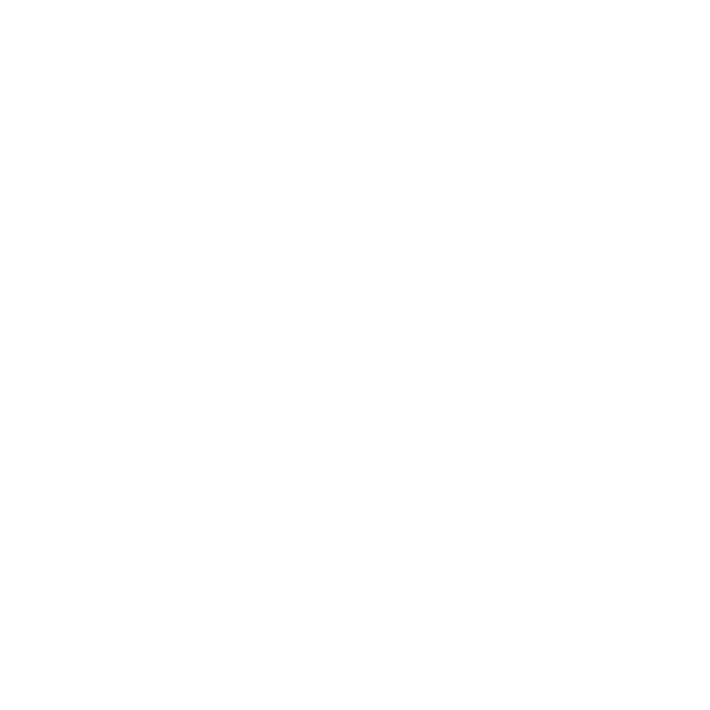
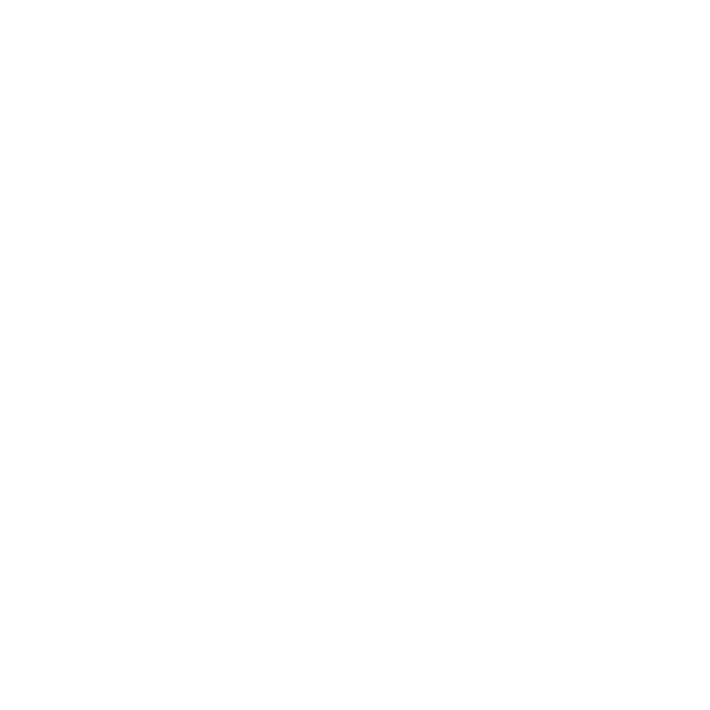
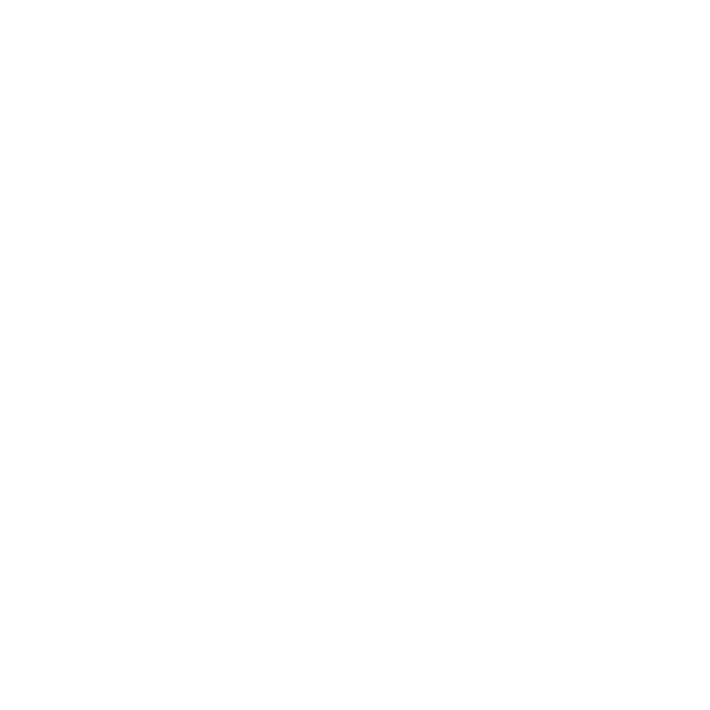
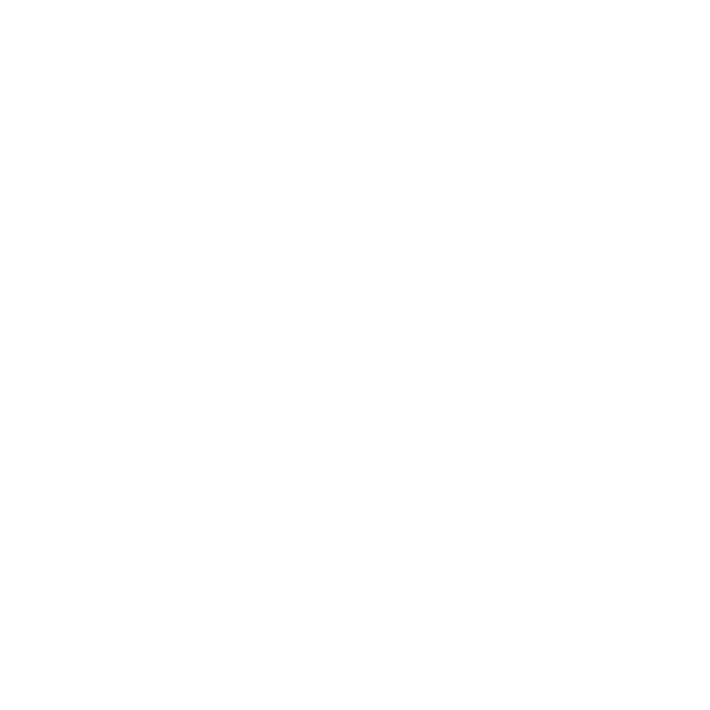
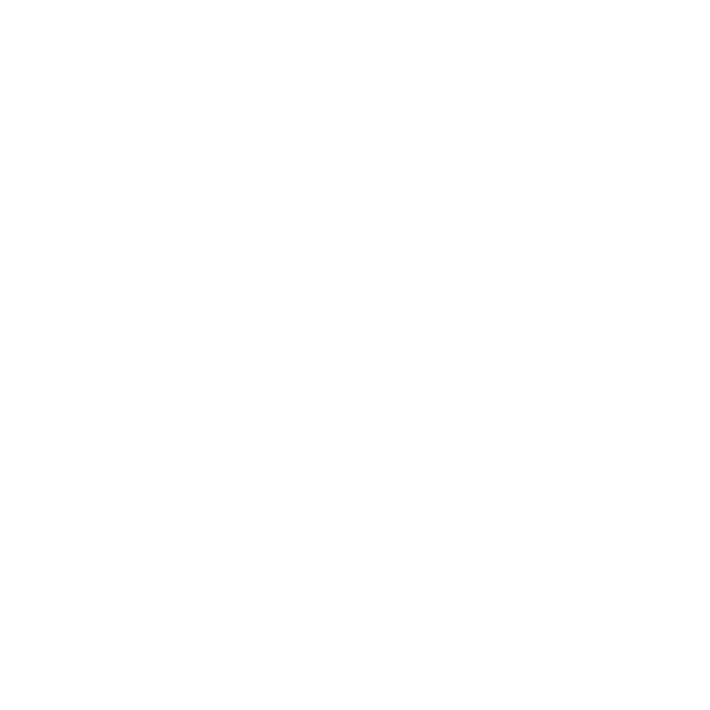
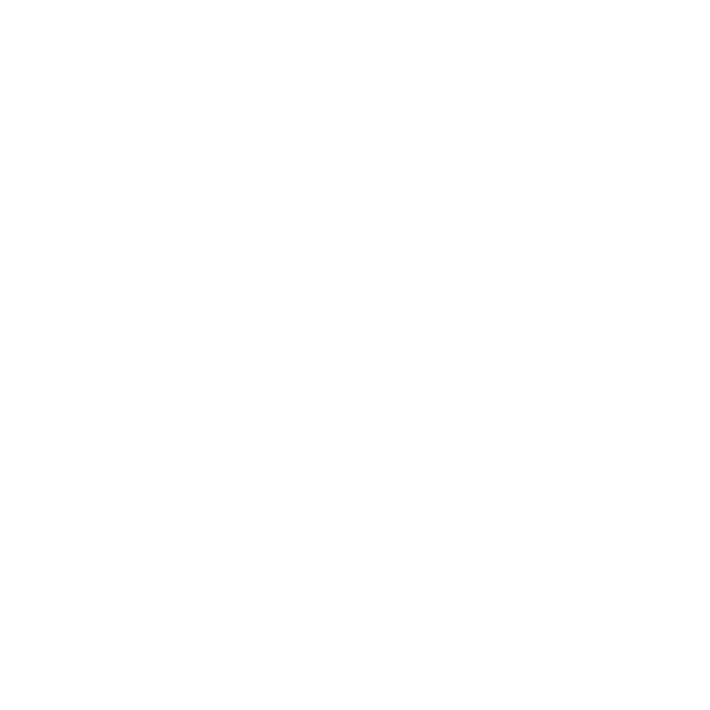
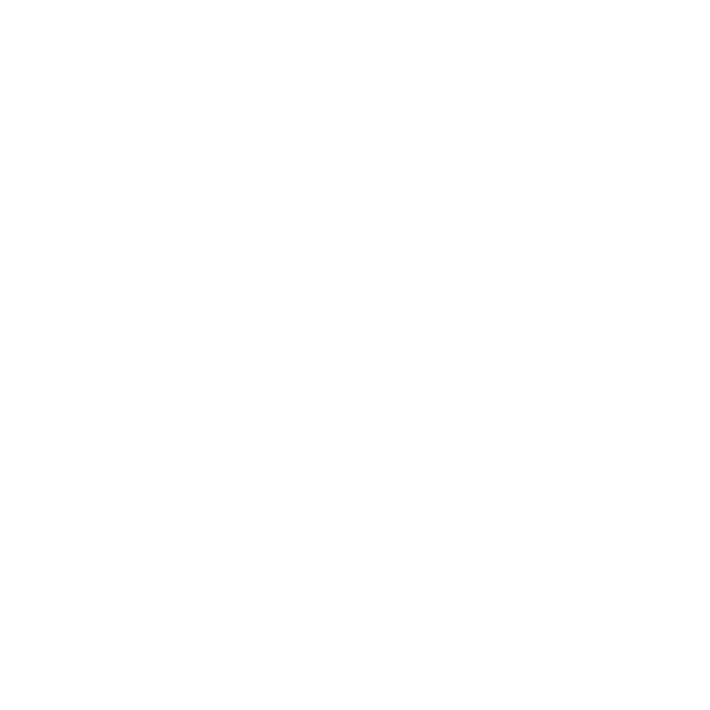
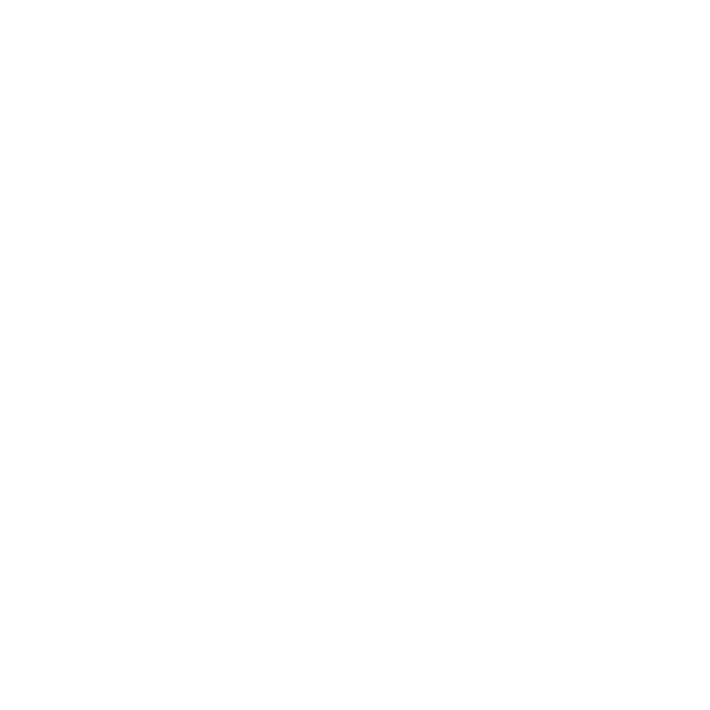
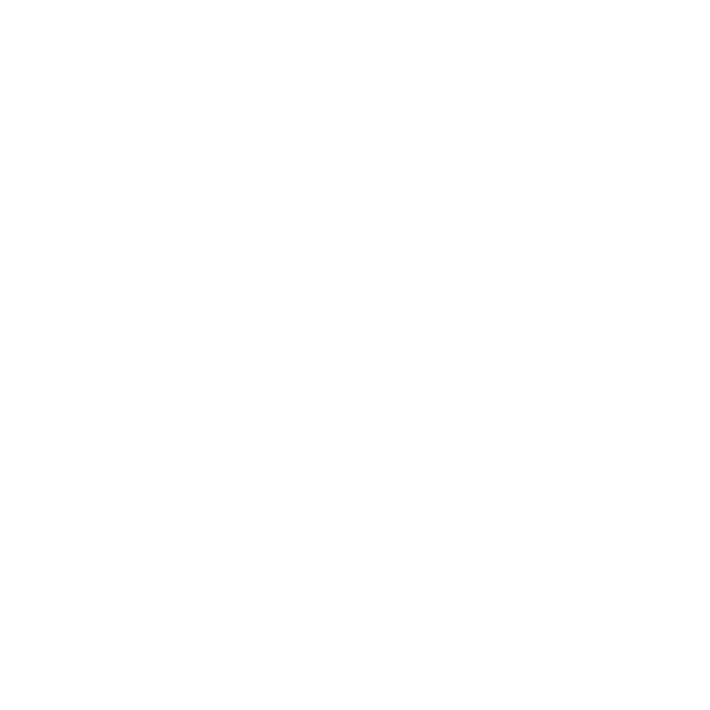
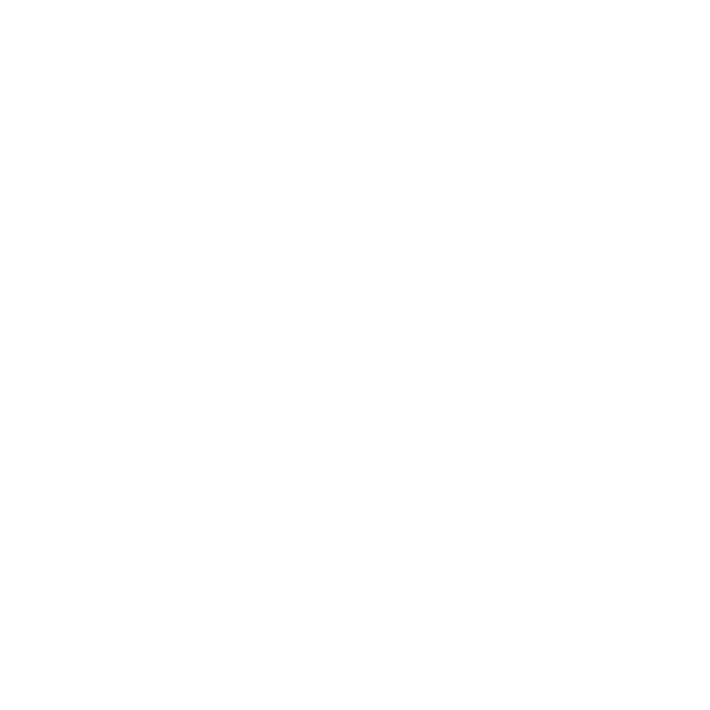
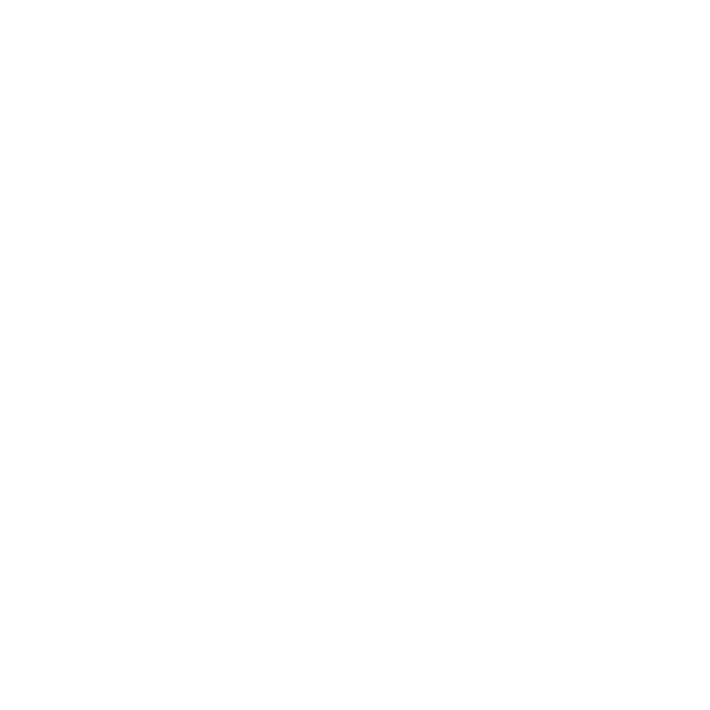
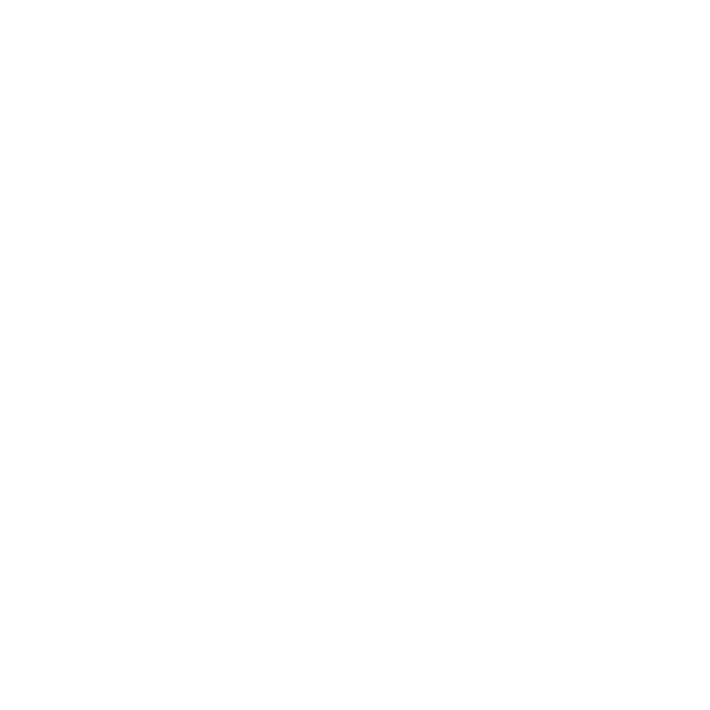
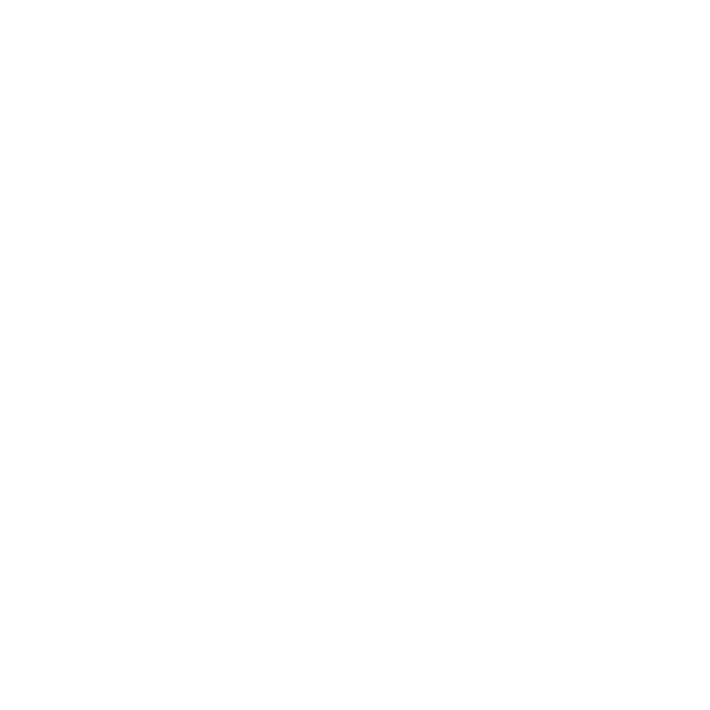
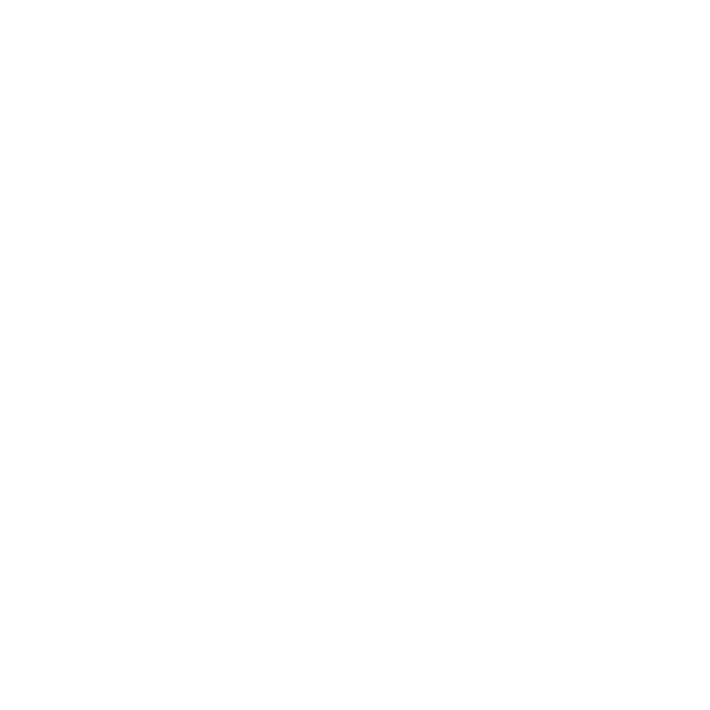
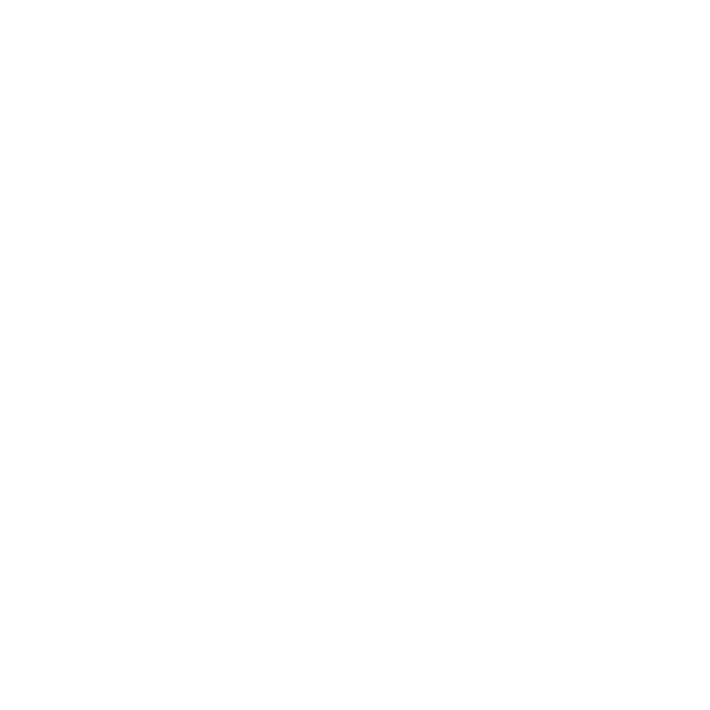
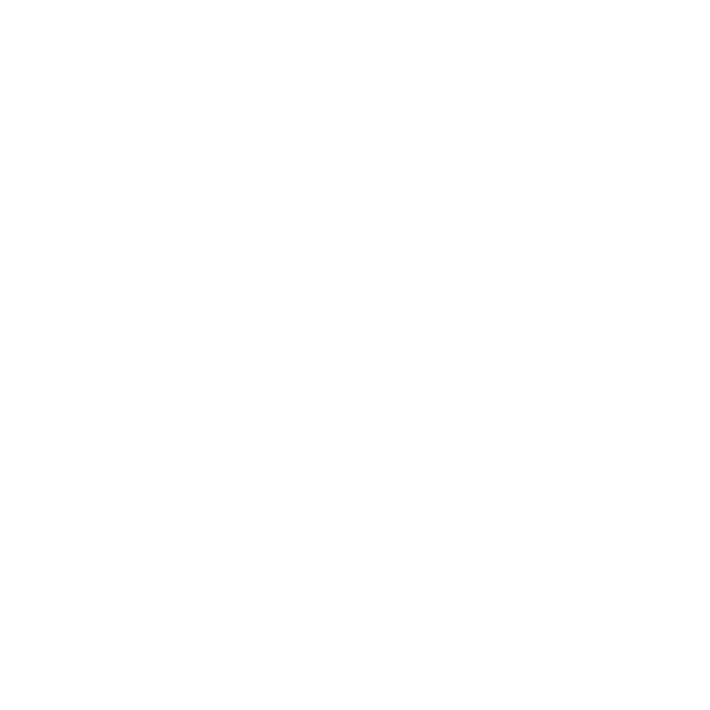
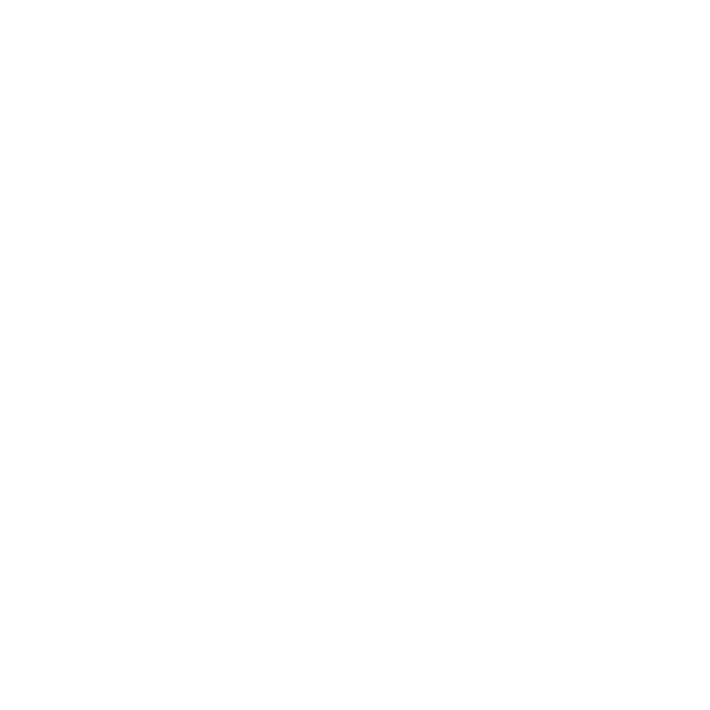

In [64]:
soup2

In [72]:
#내 방법
# pageNum = soup2.select_one('.b_size > tr:nth-child(2)>td.txt.lastCol').text.split('|')[0].strip(" 쪽")
# weight = soup2.select_one('.b_size > tr:nth-child(2)>td.txt.lastCol').text.split('|')[1].strip()# pageNum
# size = soup2.select_one('.b_size > tr:nth-child(2)>td.txt.lastCol').text.split('|')[2].strip() # size
# category = soup2.select_one('.yesAlertDl').text.strip().split('\n')[4:15:2][:3] # category
# infoText = soup2.select_one('#infoset_introduce :nth-child(2) > .infoWrap_txt').text.strip('\n\r ') #infoText
# pubReview = soup2.select_one('#infoset_pubReivew :nth-child(2) > .infoWrap_txt').text.strip('\n') #pubReview
# print(pageNum, weight, size, category, infoText, pubReview)

IndexError: list index out of range

In [141]:
detail_result.columns

Index(['book_id', 'page', 'weight', 'size', 'category', 'book_intro',
       'pub_book_intro'],
      dtype='object')

# 데이터 베이스에 자료 저장하기
* pandas 데이터 프레임을 DB에 바로 저장하기
* 일단 아나콘다에 설치해야 해<br>
    1)conda activate testenv<br>
    2)conda install pymysql<br>
    3)conda install sqlalchemy<br>

In [140]:
con = sqlite3.connect("sqlite3_yes24_best2023_01.db")
cursor = con.cursor()

In [145]:
cursor.execute(f'CREATE TABLE IF NOT EXISTS yes24_best202301({list(detail_result.columns)})')
con.commit()

In [149]:
detail_result['page'] = detail_result['page'].apply(str)

In [150]:
detail_result['weight'] = detail_result['weight'].apply(str)

In [155]:
detail_result['category'] = detail_result['category'].apply(str)

In [156]:
detail_result.to_sql('yes24_best_202301', con, if_exists='append', index=False) # 데이터베이스에 저장함.

1524

In [159]:
cursor.execute(
'''
SELECT * FROM yes24_best_202301 limit 100;
''')
for row in cursor.fetchall():
    print(row)


('115142458', '280쪽 ', ' 408g ', ' 145*210*18mm', "['노년 / 죽음', '국내도서', '인문', '주제로 읽는 인문학 ']", '\n\r\n“하나의 문이 닫히면 또 하나의 문이 열린다. \r\n그러니 더 이상 고민하지 말고 그냥 재미있게 살아라!”\r\n\r\n30년 동안 정신분석 전문의로 일해 온 김혜남이 벌써 마흔이 된 당신에게 해 주고 싶은 말들을 담은 책이다. 그녀는 지금껏 살면서 한 가지 후회하는 게 있다면 스스로를 너무 닦달하며 인생을 숙제처럼 산 것이라고 말한다. 의사로, 엄마로, 아내로, 며느리로, 딸로 살면서 늘 의무와 책임감에 치여 어떻게든 그 모든 역할을 잘해 내려 애썼고 그러다 보니 정작 누려야 할 삶의 즐거움들을 놓쳐 버렸다는 것이다. 그러다 22년 전 마흔세 살에 파킨슨병 진단을 받으며 비로소 알게 되었다. 자신이 없으면 집안도 병원도 제대로 안 굴러갈 것 같았는데 세상은 너무나 멀쩡히 잘 굴러갔다. 그제야 그녀는 자신의 곁을 지켜 주는 사람들을 다시 보게 되었고, 놓쳐서는 안 될 인생의 소중한 것들이 무엇인지를 돌아보게 되었다. 그래서 벌써 마흔이 되어 버린, 후회 없는 인생을 살고 싶은 사람들에게 말해 주고 싶은 것도 딱 한가지다. “하나의 문이 닫히면 또 하나의 문이 열린다. 그러니 더 이상 고민하지 말고 그냥 재미있게 살아라!” \r\n\r\n이 책은 2015년 ‘오늘 내가 사는 게 재미있는 이유’라는 제목으로 출간, 독자들의 사랑을 받으며 10만 부 돌파 베스트셀러가 된 것을 기념해 펴낸 스페셜 에디션으로 저자가 30년간 정신분석 전문의로 일하며 깨달은 인생의 비밀과 22년간 파킨슨병을 앓으면서도 유쾌하게 살 수 있는 이유를 전한다. 또한 ‘완벽한 때는 결코 오지 않는 법이다’, ‘때론 버티는 것이 답이다’, ‘제발 모든 것을 상처라고 말하지 말 것’, ‘가까운 사람일수록 해서는 안 될 것들이 있다’ 등 환자들에게 미처 하지 못했던 그러나 꼭 해 주고 싶은 이야기들을 담고 있다. \r\

# sqlalchemy를 이용하는 방법

In [160]:

engine = create_engine('sqlite:///data/sqlite3_yes24_best2023_01_sqlalchemy.db', echo=False)
conn = engine.raw_connection()
detail_result.to_sql('yes24_best202301_sqlalchemy', con=conn, if_exists='append')

C:\Users\hi\AppData\Local\Temp\ipykernel_7708\3776619809.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  detail_result.to_sql('yes24_best202301_sqlalchemy', con=conn, if_exists='append')


1524

In [162]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///data/sqlite3_yes24_best2023_01_sqlalchemy.db', echo=False)
conn = engine.raw_connection()
test = pd.read_sql('select * from yes24_best202301_sqlalchemy limit 10', conn)
test
conn.close()

C:\Users\hi\AppData\Local\Temp\ipykernel_7708\3176552116.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  test = pd.read_sql('select * from yes24_best202301_sqlalchemy limit 10', conn)


In [131]:
soup2.select_one("div.infoSetCont_wrap tr:nth-child(3) > td")

<td class="txt lastCol">9791190538510</td>

In [96]:
category = list({i.text for i in soup2.select('div.infoSetCont_wrap > dl:nth-child(1) > dd > ul a') if soup2.select('div.infoSetCont_wrap > dl:nth-child(1) > dd > ul a') !=None})

In [74]:
soup2.select_one("div.infoSetCont_wrap tr:nth-child(3) > td")

<td class="txt lastCol">308쪽 | 412g | 128*188*30mm</td>

In [102]:
book_intro = soup2.select_one('.infoWrap_txtInner').text if soup2.select_one('.infoWrap_txtInner') !=None else ""

'\n\r\n『칼의 노래』를 넘어서는 깊이와 감동김훈이 반드시 써내야만 했던 일생의 과업   ‘우리 시대 최고의 문장가’ ‘작가들의 작가’로 일컬어지는 소설가 김훈의 신작 장편소설 『하얼빈』이 출간되었다. 『하얼빈』은 김훈이 작가로 활동하는 내내 인생 과업으로 삼아왔던 특별한 작품이다. 작가는 청년 시절부터 안중근의 짧고 강렬했던 생애를 소설로 쓰려는 구상을 품고 있었고, 안중근의 움직임이 뿜어내는 에너지를 글로 감당하기 위해 오랜 시간을 들여 ‘인간 안중근’을 깊이 이해해나갔다. 그리고 2022년 여름, 치열하고 절박한 집필 끝에 드디어 그 결과물을 세상에 내놓게 되었다.  『하얼빈』에서는 단순하게 요약되기 쉬운 실존 인물의 삶을 역사적 기록보다도 철저한 상상으로 탄탄하게 재구성하는 김훈의 글쓰기 방식이 빛을 발한다. 이러한 서사는 자연스럽게 김훈의 대표작 『칼의 노래』를 떠올리게 하는데, 『칼의 노래』가 명장으로서 이룩한 업적에 가려졌던 이순신의 요동하는 내면을 묘사했다면 『하얼빈』은 안중근에게 드리워져 있던 영웅의 그늘을 걷어내고 그의 가장 뜨겁고 혼란스러웠을 시간을 현재에 되살려놓는다.  난세를 헤쳐가야 하는 운명을 마주한 미약한 인간의 내면에 집중하는 김훈의 시선은 『하얼빈』에서 더욱 깊이 있고 오묘한 장면들을 직조해낸다. 소설 안에서 이토 히로부미로 상징되는 제국주의의 물결과 안중근으로 상징되는 청년기의 순수한 열정이 부딪치고, 살인이라는 중죄에 임하는 한 인간의 대의와 윤리가 부딪치며, 안중근이 천주교인으로서 지닌 신앙심과 속세의 인간으로서 지닌 증오심이 부딪친다. 이토록 다양한 층위에서 벌어지는 복합적인 갈등을 날렵하게 다뤄내며 안중근이라는 인물을 바라보는 시야의 차원을 높이는 이 작품은 김훈의 새로운 대표작으로 소개되기에 모자람이 없다.                                \n'

In [106]:
pub_book_intro = soup2.select_one('.infoWrap_txt').text if soup2.select_one('.infoWrap_txt') !=None else ""

In [ ]:
r = requests.get(url, params=payload)
print(r.url)
print(r.status_code)

In [ ]:
response = r.text

In [ ]:
soup = bs(response, 'lxml')

In [ ]:
soup.select_one('.gd_name').text #title

In [ ]:
soup.select_one('.authPub.info_auth > a').text # author

In [ ]:
soup.select_one('.authPub.info_auth > a')["href"] # detail_link

In [ ]:
soup.select_one('.authPub.info_pub > a').text

In [ ]:
soup.select_one('.authPub.info_date').text

In [ ]:
soup.select_one('.yes_b').text # price

In [ ]:
soup.select_one('.saleNum').text.strip("\r\n 판매지수") #saleNum

In [ ]:
soup.select_one('.txC_blue').text #review

In [ ]:
soup.select_one('.rating_grade >.yes_b').text #rating

In [ ]:
title = soup.select_one('.gd_name').text
author = soup.select_one('.authPub.info_auth > a').text
detail_link = soup.select_one('.authPub.info_auth > a')["href"]
pub_info = soup.select_one('.authPub.info_pub > a').text
date_info = soup.select_one('.authPub.info_date').text
price = soup.select_one('.yes_b').text
sale_num = soup.select_one('.saleNum').text.strip("\r\n 판매지수")
review = soup.select_one('.txC_blue').text
rating = soup.select_one('.rating_grade >.yes_b').text
print(title, author, detail_link, pub_info, date_info, price, sale_num, review, rating)

In [ ]:
yes_best_list = soup.select_one(".sGLi.tp_book.tp_chkG.tp_best.tp_list").select("li")

In [ ]:

yes_best_info = []
for book in yes_best_list:
    title = book.select_one('.gd_name').text if book.select_one('.gd_name') !=None else "None"
    author = book.select_one('.authPub.info_auth > a').text if book.select_one('.authPub.info_auth > a') !=None else "None"
    detail_link = book.select_one('.authPub.info_auth > a')["href"] if book.select_one('.authPub.info_auth > a') !=None else "None"
    pub_info = book.select_one('.authPub.info_pub > a').text if book.select_one('.authPub.info_pub > a') !=None else "None"
    date_info = book.select_one('.authPub.info_date').text if book.select_one('.authPub.info_date') !=None else "None"
    price = book.select_one('.yes_b').text if book.select_one('.yes_b') !=None else "None"
    sale_num = book.select_one('.saleNum').text.strip("\r\n 판매지수") if book.select_one('.saleNum') !=None else "None"
    review = book.select_one('.txC_blue').text if book.select_one('.txC_blue') !=None else "None"
    rating = book.select_one('.rating_grade >.yes_b').text if book.select_one('.rating_grade >.yes_b') !=None else "None"
    yes_best_info.append([title, author, detail_link, pub_info, date_info, price, sale_num, review, rating])

In [ ]:
print(yes_best_info)

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(yes_best_info, columns=['title', 'author', 'detail_link', 'pub_info', 'date_info', 'price', 'sale_num', 'review', 'rating'])

In [ ]:
df

In [ ]:
page = 1
month = 1
year = 2023
yes_best_info = []
for month in range(1,10):
    for page in range(1,10):
        url = "https://www.yes24.com/Product/Category/MonthWeekBestSeller"
        payload = dict(categoryNumber='001', pageNumber={page}, pageSize=120, type='month', saleYear=2023, saleMonth={month})
        r = requests.get(url, params=payload)
        response = r.text
        soup = bs(response, 'lxml') # 파싱
        yes_best_list = soup.select_one(".sGLi.tp_book.tp_chkG.tp_best.tp_list").select("li")
        for books in yes_best_list:
            title = books.select_one('.gd_name').text if book.select_one('.gd_name') !=None else "None"
            author = books.select_one('.authPub.info_auth > a').text if book.select_one('.authPub.info_auth > a') !=None else "None"
            detail_link = books.select_one('.authPub.info_auth > a')["href"] if book.select_one('.authPub.info_auth > a') !=None else "None"
            pub_info = books.select_one('.authPub.info_pub > a').text if book.select_one('.authPub.info_pub > a') !=None else "None"
            date_info = books.select_one('.authPub.info_date').text if book.select_one('.authPub.info_date') !=None else "None"
            price = books.select_one('.yes_b').text if book.select_one('.yes_b') !=None else "None"
            sale_num = books.select_one('.saleNum').text.strip("\r\n 판매지수") if book.select_one('.saleNum') !=None else "None"
            review = books.select_one('.txC_blue').text if book.select_one('.txC_blue') !=None else "None"
            rating = books.select_one('.rating_grade >.yes_b').text if book.select_one('.rating_grade >.yes_b') !=None else "None"
            yes_best_info.append([title, author, pub_info, date_info, price, sale_num, review, rating, detail_link])
        time.sleep(5)
            #print(len(yes_best_info))
        # print(r.url)
        # print(f"현재{page}페이지 {month} 월 크롤링중")

    

### 꿀팁 
 * print(f"현재{page}페이지 {month} 월 크롤링중")

In [ ]:
yesBook_df = pd.DataFrame(yes_best_info, columns=['title', 'author', 'pub_info', 'date_info', 'price', 'sale_num', 'review', 'rating','detail_link'])

In [ ]:
yesBook_df